# Atividade 02 - Classificação linear e kNN

## Aprendizado de Máquina - IA048

Álvaro Tona Ribas Cruz - 239520

Antonio César de Andrade Júnior - 245628 

## 0 - Imports

In [ ]:
import logging
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
import numpy as np
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.metrics import roc_curve, roc_auc_score
import seaborn as sns
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, balanced_accuracy_score
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import KFold
from sklearn.multiclass import OneVsOneClassifier

## 1- Dataset tratado

In [ ]:
logging.basicConfig(level=logging.currentframe)

In [ ]:
train_x = pd.read_csv("X_train.txt", header = None, delim_whitespace=True)
train_y = pd.read_csv("y_train.txt", header = None)

test_x = pd.read_csv("X_test.txt", header = None, delim_whitespace=True)
test_y = pd.read_csv("y_test.txt", header = None)
train_x

,0,1,2,3,4,5,6,7,8,9,...,551,552,553,554,555,556,557,558,559,560
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.074323,-0.298676,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,0.158075,-0.595051,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,0.414503,-0.390748,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,0.404573,-0.117290,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,0.087753,-0.351471,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7347,0.299665,-0.057193,-0.181233,-0.195387,0.039905,0.077078,-0.282301,0.043616,0.060410,0.210795,...,-0.070157,-0.588433,-0.880324,-0.190437,0.829718,0.206972,-0.425619,-0.791883,0.238604,0.049819
7348,0.273853,-0.007749,-0.147468,-0.235309,0.004816,0.059280,-0.322552,-0.029456,0.080585,0.117440,...,0.165259,-0.390738,-0.680744,0.064907,0.875679,-0.879033,0.400219,-0.771840,0.252676,0.050053
7349,0.273387,-0.017011,-0.045022,-0.218218,-0.103822,0.274533,-0.304515,-0.098913,0.332584,0.043999,...,0.195034,0.025145,-0.304029,0.052806,-0.266724,0.864404,0.701169,-0.779133,0.249145,0.040811
7350,0.289654,-0.018843,-0.158281,-0.219139,-0.111412,0.268893,-0.310487,-0.068200,0.319473,0.101702,...,0.013865,0.063907,-0.344314,-0.101360,0.700740,0.936674,-0.589479,-0.785181,0.246432,0.025339


## 2 - Parte A

In [ ]:
train_x = np.array(train_x)
train_y = train_y.values.ravel()

In [ ]:
kf = KFold(n_splits=5)
multi_class = ["ovo", "ovr", "multinomial"]


In [ ]:
for k in multi_class:
  classificador1=0
  soma1 = 0
  soma2 = 0
  soma3 = 0
  soma4 = 0
  soma5 = 0
  if k == "ovo":
    classificador1 = OneVsOneClassifier(LogisticRegression(random_state=0, solver = 'sag', max_iter = 1000))
  else:
    classificador1 = LogisticRegression(random_state=0, solver = 'sag', multi_class = k, max_iter = 1000)

  for i, (train_index, val_index) in enumerate(kf.split(train_x)):
    classificador1.fit(train_x[train_index], train_y[train_index])
    y_pred = classificador1.predict(train_x[val_index])
    soma1 += (accuracy_score(train_y[val_index], y_pred))*100
    soma2 += (balanced_accuracy_score(train_y[val_index], y_pred))*100
    soma3 += (precision_score(train_y[val_index], y_pred, average = 'macro'))*100
    soma4 += (recall_score(train_y[val_index], y_pred, average = 'macro'))*100
    soma5 += (f1_score(train_y[val_index], y_pred, average = 'macro'))*100

  print("multi_class=%s, accuracy=%.2f%%, balanced_accuracy=%.2f%%, precision=%.2f%%, recall=%.2f%%, f1=%.2f%%" %
   (k, (soma1/5), (soma2/5), (soma3/5), (soma4/5), (soma5/5)))




multi_class=ovo, accuracy=93.40%, balanced_accuracy=93.19%, precision=93.90%, recall=93.19%, f1=93.19%
multi_class=ovr, accuracy=93.58%, balanced_accuracy=93.34%, precision=94.24%, recall=93.34%, f1=93.44%
multi_class=multinomial, accuracy=93.47%, balanced_accuracy=93.25%, precision=93.95%, recall=93.25%, f1=93.27%


In [ ]:
classificador1 = LogisticRegression(random_state=0, solver = 'sag', multi_class = 'ovr', max_iter = 1000).fit(train_x, train_y)

In [ ]:
y_pred = classificador1.predict(test_x)

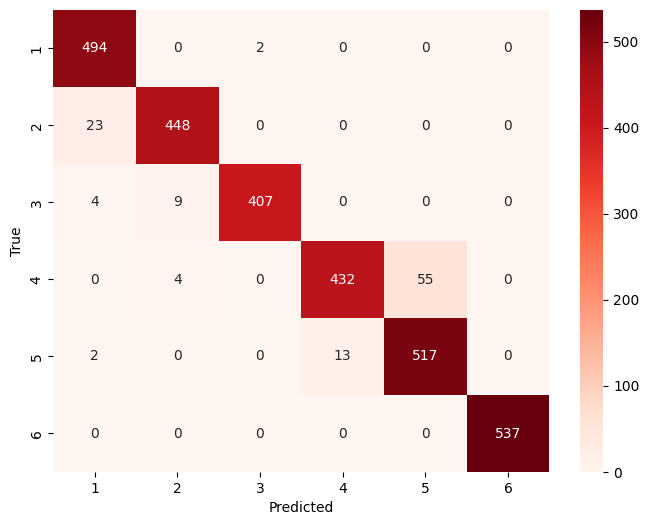

In [ ]:
cm = confusion_matrix(test_y, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Reds', fmt='g', xticklabels=['1', '2', '3', '4', '5', '6'], yticklabels=['1', '2', '3', '4', '5', '6'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [ ]:
print("accuracy=%.2f%%, balanced_accuracy=%.2f%%, precision=%.2f%%, recall=%.2f%%, f1=%.2f%%" %
   ((accuracy_score(test_y, y_pred))*100, (balanced_accuracy_score(test_y, y_pred))*100,
    (precision_score(test_y, y_pred, average = 'macro'))*100, (recall_score(test_y, y_pred, average = 'macro'))*100,
     (f1_score(test_y, y_pred, average = 'macro'))*100))

accuracy=96.20%, balanced_accuracy=96.13%, precision=96.43%, recall=96.13%, f1=96.21%


In [ ]:
classificador2 = SGDClassifier(loss = 'log_loss', shuffle=False, learning_rate='constant', eta0=0.001, max_iter = 1000).fit(train_x, train_y)

In [ ]:
y_pred = classificador2.predict(test_x)

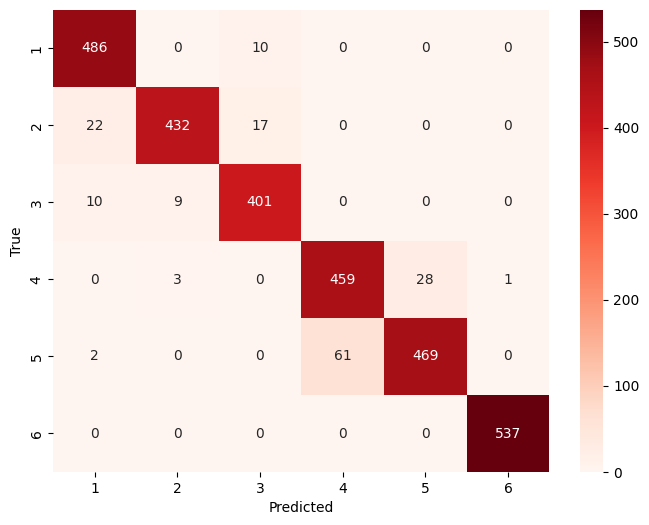

In [ ]:
cm = confusion_matrix(test_y, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Reds', fmt='g', xticklabels=['1', '2', '3', '4', '5', '6'], yticklabels=['1', '2', '3', '4', '5', '6'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [ ]:
print("accuracy=%.2f%%, balanced_accuracy=%.2f%%, precision=%.2f%%, recall=%.2f%%, f1=%.2f%%" %
   ((accuracy_score(test_y, y_pred))*100, (balanced_accuracy_score(test_y, y_pred))*100,
    (precision_score(test_y, y_pred, average = 'macro'))*100, (recall_score(test_y, y_pred, average = 'macro'))*100,
     (f1_score(test_y, y_pred, average = 'macro'))*100))

accuracy=94.47%, balanced_accuracy=94.47%, precision=94.48%, recall=94.47%, f1=94.42%


## 3 - Parte B

In [ ]:
k_values = range(1, 31)
scores = []

In [ ]:
folds = KFold(n_splits=5, shuffle=False, random_state=None)

In [ ]:
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    pre_scores = cross_val_score(knn, train_x, train_y, cv=folds, scoring='accuracy')
    scores.append(pre_scores.mean())

In [ ]:
best_k = k_values[np.argmax(scores)]
best_score = max(scores)
best_k

16

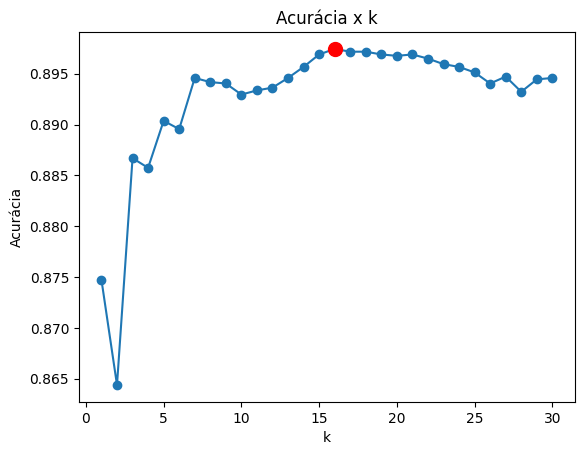

In [ ]:
plt.plot(k_values, scores, marker='o')
plt.scatter(best_k, best_score, color='red', s=100, zorder=5)
plt.xlabel('k')
plt.ylabel('Acurácia')
plt.title('Acurácia x k')
plt.show()

In [ ]:
knn = KNeighborsClassifier(n_neighbors=16).fit(train_x,train_y)

In [ ]:
y_pred = knn.predict(test_x)

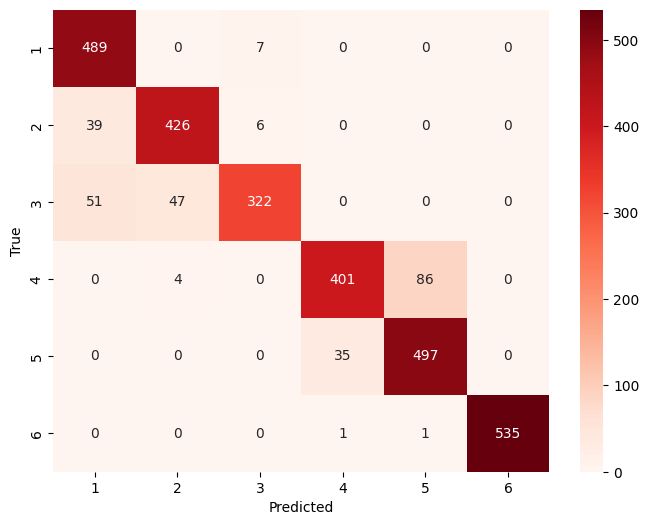

In [ ]:
cm = confusion_matrix(test_y, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Reds', fmt='g', xticklabels=['1', '2', '3', '4', '5', '6'], yticklabels=['1', '2', '3', '4', '5', '6'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [ ]:
print("accuracy=%.2f%%, balanced_accuracy=%.2f%%, precision=%.2f%%, recall=%.2f%%, f1=%.2f%%" %
   ((accuracy_score(test_y, y_pred))*100, (balanced_accuracy_score(test_y, y_pred))*100,
    (precision_score(test_y, y_pred, average = 'macro'))*100, (recall_score(test_y, y_pred, average = 'macro'))*100,
     (f1_score(test_y, y_pred, average = 'macro'))*100))

accuracy=90.60%, balanced_accuracy=90.07%, precision=91.12%, recall=90.07%, f1=90.24%


## 4 - Dataset bruto

In [ ]:
train_acc_bruto_x = pd.read_csv("body_acc_x_train.txt", header = None, delim_whitespace=True)
train_acc_bruto_y = pd.read_csv("body_acc_y_train.txt", header = None, delim_whitespace=True)
train_acc_bruto_z = pd.read_csv("body_acc_z_train.txt", header = None, delim_whitespace=True)
train_gyro_bruto_x = pd.read_csv("body_gyro_x_train.txt", header = None, delim_whitespace=True)
train_gyro_bruto_y = pd.read_csv("body_gyro_y_train.txt", header = None, delim_whitespace=True)
train_gyro_bruto_z = pd.read_csv("body_gyro_z_train.txt", header = None, delim_whitespace=True)

test_acc_bruto_x = pd.read_csv("body_acc_x_test.txt", header = None, delim_whitespace=True)
test_acc_bruto_y = pd.read_csv("body_acc_y_test.txt", header = None, delim_whitespace=True)
test_acc_bruto_z = pd.read_csv("body_acc_z_test.txt", header = None, delim_whitespace=True)
test_gyro_bruto_x = pd.read_csv("body_gyro_x_test.txt", header = None, delim_whitespace=True)
test_gyro_bruto_y = pd.read_csv("body_gyro_y_test.txt", header = None, delim_whitespace=True)
test_gyro_bruto_z = pd.read_csv("body_gyro_z_test.txt", header = None, delim_whitespace=True)

In [ ]:
train_x_concat = pd.concat([train_acc_bruto_x, train_acc_bruto_y, train_acc_bruto_z, train_gyro_bruto_x, train_gyro_bruto_y, train_gyro_bruto_z], axis=1)

test_x_concat = pd.concat([test_acc_bruto_x, test_acc_bruto_y, test_acc_bruto_z, test_gyro_bruto_x, test_gyro_bruto_y, test_gyro_bruto_z], axis=1)

In [ ]:
train_x = np.array(train_x_concat)

In [ ]:
test_x_concat

,0,1,2,3,4,5,6,7,8,9,...,118,119,120,121,122,123,124,125,126,127
0,0.011653,0.013109,0.011269,0.027831,0.002318,-0.018965,-0.061920,-0.094248,-0.079534,-0.070084,...,0.064141,0.064519,0.064129,0.062249,0.056800,0.049120,0.041762,0.032258,0.027008,0.030546
1,0.009280,0.004930,0.003954,0.009214,0.016156,0.014079,0.013105,0.021247,0.026823,0.031054,...,0.039078,0.039960,0.032358,0.019246,0.017810,0.035285,0.054717,0.058311,0.051000,0.036979
2,0.005732,0.007066,0.005110,0.002434,0.002024,0.001382,0.001930,0.004875,0.003776,0.002400,...,0.022114,0.026575,0.026929,0.034150,0.032427,0.024935,0.023925,0.020328,0.016454,0.014167
3,0.000452,0.000604,-0.002485,-0.004562,-0.006002,-0.006382,-0.005276,-0.001489,0.005153,0.004951,...,0.001784,0.000720,-0.005114,-0.006292,-0.008459,-0.014525,-0.012205,-0.011330,-0.009363,0.001263
4,-0.004362,-0.002765,-0.004905,-0.004682,-0.000267,0.004135,0.005626,0.000933,-0.001542,0.003020,...,0.039331,0.032300,0.016035,0.000662,-0.015730,-0.023228,-0.023526,-0.025179,-0.018610,-0.010833
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2942,0.107662,0.124079,0.183420,0.289247,0.393799,0.446456,0.436931,0.363053,0.279962,0.152701,...,-0.666728,-0.809653,-0.930400,-0.952680,-0.908081,-0.823629,-0.699270,-0.607587,-0.625641,-0.704183
2943,-0.042392,-0.017244,0.015269,0.064482,0.086802,0.084482,0.101578,0.130484,0.208370,0.310620,...,0.235924,0.021526,-0.372343,-0.637858,-0.511035,-0.283016,-0.085658,0.017245,-0.157011,-0.374259
2944,-0.147647,-0.169903,-0.168698,-0.138600,-0.144781,-0.072979,-0.040348,-0.023016,-0.025176,-0.074406,...,0.193565,0.199671,0.225366,0.321809,0.456428,0.528796,0.273040,-0.121107,-0.210040,-0.129691
2945,0.071227,-0.088665,-0.070675,-0.116887,-0.214117,-0.219928,-0.275024,-0.229062,-0.245309,-0.242260,...,0.320620,0.288623,0.320723,0.361976,0.352907,0.305887,0.252091,0.233249,0.300152,0.431867


## 5 - Parte C

In [ ]:
for k in multi_class:
  classificador1=0
  soma1 = 0
  soma2 = 0
  soma3 = 0
  soma4 = 0
  soma5 = 0
  if k == "ovo":
    classificador1 = OneVsOneClassifier(LogisticRegression(random_state=0, solver = 'sag', max_iter = 1000))
  else:
    classificador1 = LogisticRegression(random_state=0, solver = 'sag', multi_class = k, max_iter = 1000)

  for i, (train_index, val_index) in enumerate(kf.split(train_x)):
    classificador1.fit(train_x[train_index], train_y[train_index])
    y_pred = classificador1.predict(train_x[val_index])
    soma1 += (accuracy_score(train_y[val_index], y_pred))*100
    soma2 += (balanced_accuracy_score(train_y[val_index], y_pred))*100
    soma3 += (precision_score(train_y[val_index], y_pred, average = 'macro'))*100
    soma4 += (recall_score(train_y[val_index], y_pred, average = 'macro'))*100
    soma5 += (f1_score(train_y[val_index], y_pred, average = 'macro'))*100

  print("multi_class=%s, accuracy=%.2f%%, balanced_accuracy=%.2f%%, precision=%.2f%%, recall=%.2f%%, f1=%.2f%%" %
   (k, (soma1/5), (soma2/5), (soma3/5), (soma4/5), (soma5/5)))




multi_class=ovo, accuracy=31.54%, balanced_accuracy=30.80%, precision=33.40%, recall=30.80%, f1=30.52%
multi_class=ovr, accuracy=31.26%, balanced_accuracy=30.55%, precision=32.51%, recall=30.55%, f1=29.18%
multi_class=multinomial, accuracy=31.18%, balanced_accuracy=30.43%, precision=32.37%, recall=30.43%, f1=29.03%


In [ ]:
classificador1 = OneVsOneClassifier(LogisticRegression(random_state=0, solver = 'sag', max_iter = 1000)).fit(train_x, train_y)

In [ ]:
y_pred = classificador1.predict(test_x_concat)

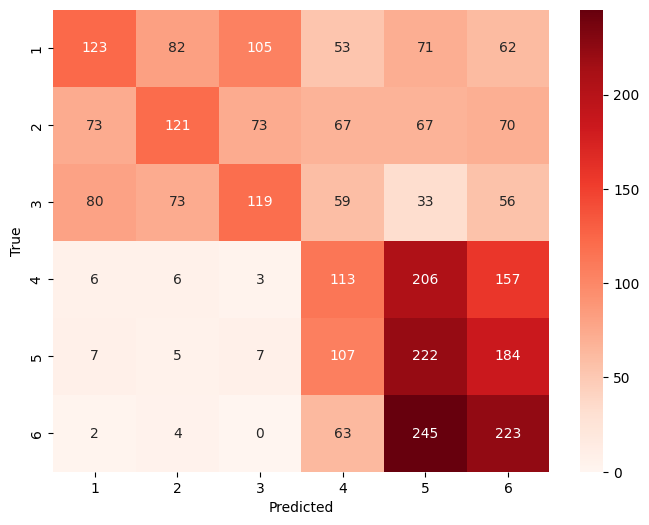

In [ ]:
cm = confusion_matrix(test_y, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Reds', fmt='g', xticklabels=['1', '2', '3', '4', '5', '6'], yticklabels=['1', '2', '3', '4', '5', '6'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [ ]:
print("accuracy=%.2f%%, balanced_accuracy=%.2f%%, precision=%.2f%%, recall=%.2f%%, f1=%.2f%%" %
   ((accuracy_score(test_y, y_pred))*100, (balanced_accuracy_score(test_y, y_pred))*100,
    (precision_score(test_y, y_pred, average = 'macro'))*100, (recall_score(test_y, y_pred, average = 'macro'))*100,
     (f1_score(test_y, y_pred, average = 'macro'))*100))

accuracy=31.25%, balanced_accuracy=30.85%, precision=33.84%, recall=30.85%, f1=31.06%


In [ ]:
k_values = range(1, 31)
scores = []

In [ ]:
folds = KFold(n_splits=5, shuffle=False, random_state=None)

In [ ]:
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    pre_scores = cross_val_score(knn, train_x, train_y, cv=folds, scoring='accuracy')
    scores.append(pre_scores.mean())

In [ ]:
best_k = k_values[np.argmax(scores)]
best_score = max(scores)
best_k

1

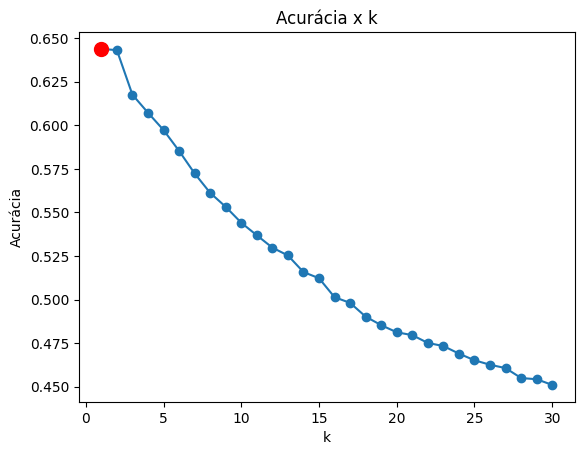

In [ ]:
plt.plot(k_values, scores, marker='o')
plt.scatter(best_k, best_score, color='red', s=100, zorder=5)
plt.xlabel('k')
plt.ylabel('Acurácia')
plt.title('Acurácia x k')
plt.show()

In [ ]:
knn = KNeighborsClassifier(n_neighbors=1).fit(train_x,train_y)

In [ ]:
y_pred = knn.predict(test_x_concat)

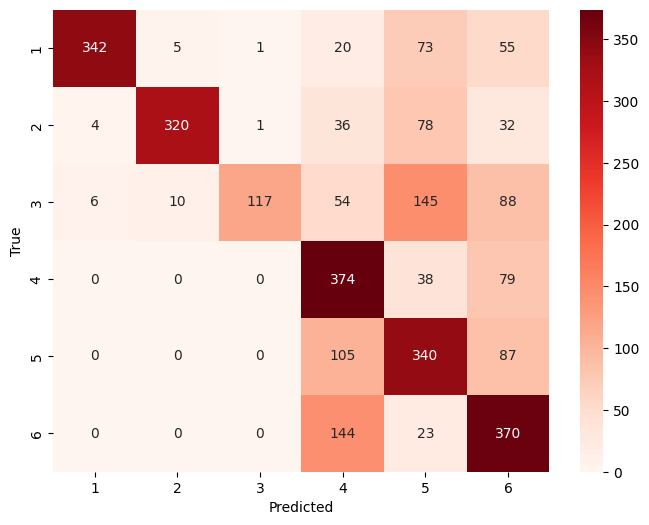

In [ ]:
cm = confusion_matrix(test_y, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Reds', fmt='g', xticklabels=['1', '2', '3', '4', '5', '6'], yticklabels=['1', '2', '3', '4', '5', '6'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [ ]:
print("accuracy=%.2f%%, balanced_accuracy=%.2f%%, precision=%.2f%%, recall=%.2f%%, f1=%.2f%%" %
   ((accuracy_score(test_y, y_pred))*100, (balanced_accuracy_score(test_y, y_pred))*100,
    (precision_score(test_y, y_pred, average = 'macro'))*100, (recall_score(test_y, y_pred, average = 'macro'))*100,
     (f1_score(test_y, y_pred, average = 'macro'))*100))

accuracy=63.22%, balanced_accuracy=62.29%, precision=73.81%, recall=62.29%, f1=63.20%
